# Dataset Overview and Characteristics Analysis

In [1]:
import pandas as pd

# Load the dataset
# dataset_path = '/content/survey_cleaned.csv'
dataset_path = '/content/survey_cleaned.csv'
data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
data_types = df.dtypes

# Get descriptive statistics for all columns
descriptive_statistics = df.describe(include='all')

# Get the number of missing values in each column
missing_values = df.isnull().sum()

# Get the number of unique values in each column
unique_values = df.nunique()

# Print the results
print("Data Types:")
print(data_types)
print("\nDescriptive Statistics:")
print(descriptive_statistics)
print("\nMissing Values:")
print(missing_values)
print("\nUnique Values:")
print(unique_values)
# Display the first few rows of the dataset to understand its structure
data.head()

Data Types:
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

D

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:35:08,36,Male,France,NaN,Yes,Yes,No,NaN,6-25,...,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,NaN
1,2014-08-27 11:35:12,29,Male,United States,NY,No,Yes,Yes,Sometimes,100-500,...,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No,NaN
2,2014-08-27 11:35:48,46,Male,United States,MA,No,No,Yes,Often,26-100,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,NaN
3,2014-08-27 11:36:24,41,Male,United States,IA,No,No,Yes,Never,More than 1000,...,Don't know,Maybe,No,No,No,No,Yes,Don't know,No,NaN
4,2014-08-27 11:37:59,35,Female,United States,CA,No,Yes,Yes,Rarely,6-25,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


# EDA

**Geographical** **Analysis**

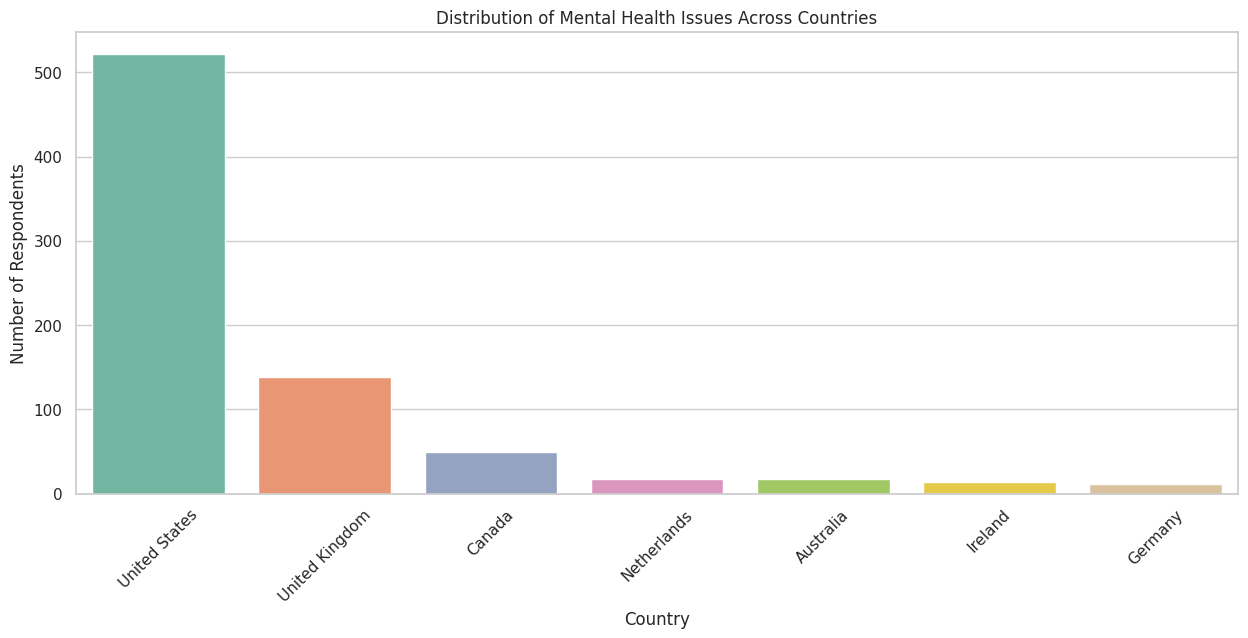

In [2]:
# We will create visualizations to illustrate the distribution of mental health issues across different countries.

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Geographical Analysis: Distribution of mental health issues across countries
# We'll focus on countries with a significant number of respondents for meaningful analysis
country_counts = data['Country'].value_counts()
significant_countries = country_counts[country_counts > 10]  # Countries with more than 10 respondents

# Filtering the dataset for these countries
significant_data = data[data['Country'].isin(significant_countries.index)]

# Plotting the distribution of mental health issues in these countries
plt.figure(figsize=(15, 6))
sns.countplot(x='Country', data=significant_data, palette="Set2", order=significant_countries.index)
plt.xticks(rotation=45)
plt.title('Distribution of Mental Health Issues Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.show()

**Age** **Group** **Analysis**

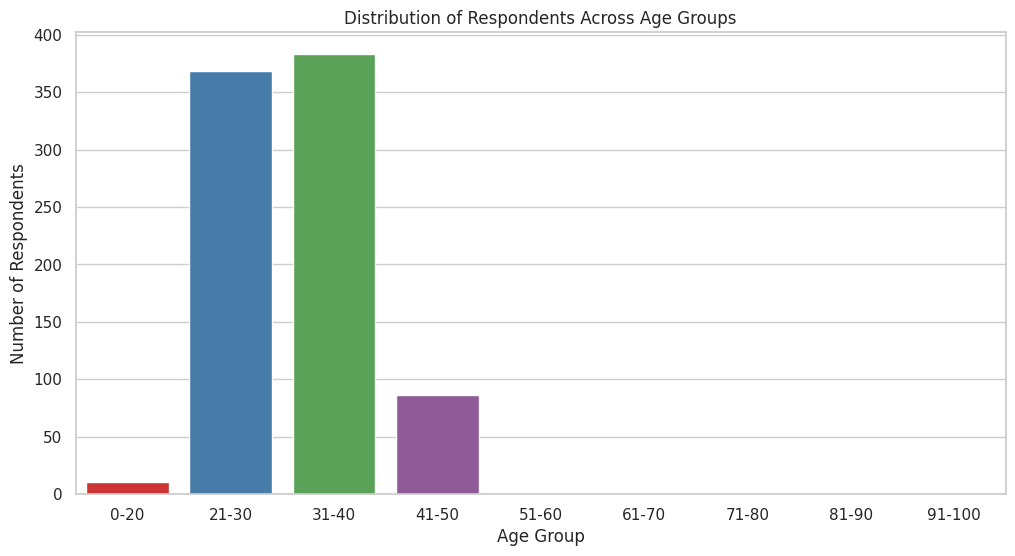

In [3]:
# Creating age groups
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"]
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Plotting the distribution of age groups
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Group', data=data, palette="Set1")
plt.title('Distribution of Respondents Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.show()

**Correlation** **between** **Family** **History** **and** **Treatment**

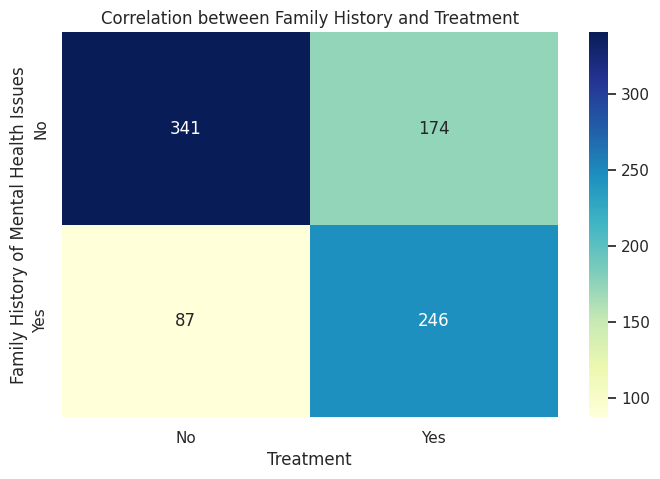

In [4]:
# Creating a crosstab for family history and treatment
family_history_treatment = pd.crosstab(data['family_history'], data['treatment'])

# Plotting the correlation between family history and treatment
plt.figure(figsize=(8, 5))
sns.heatmap(family_history_treatment, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Correlation between Family History and Treatment')
plt.xlabel('Treatment')
plt.ylabel('Family History of Mental Health Issues')
plt.show()


**heatmap** **of** **variables correlation with treatment**

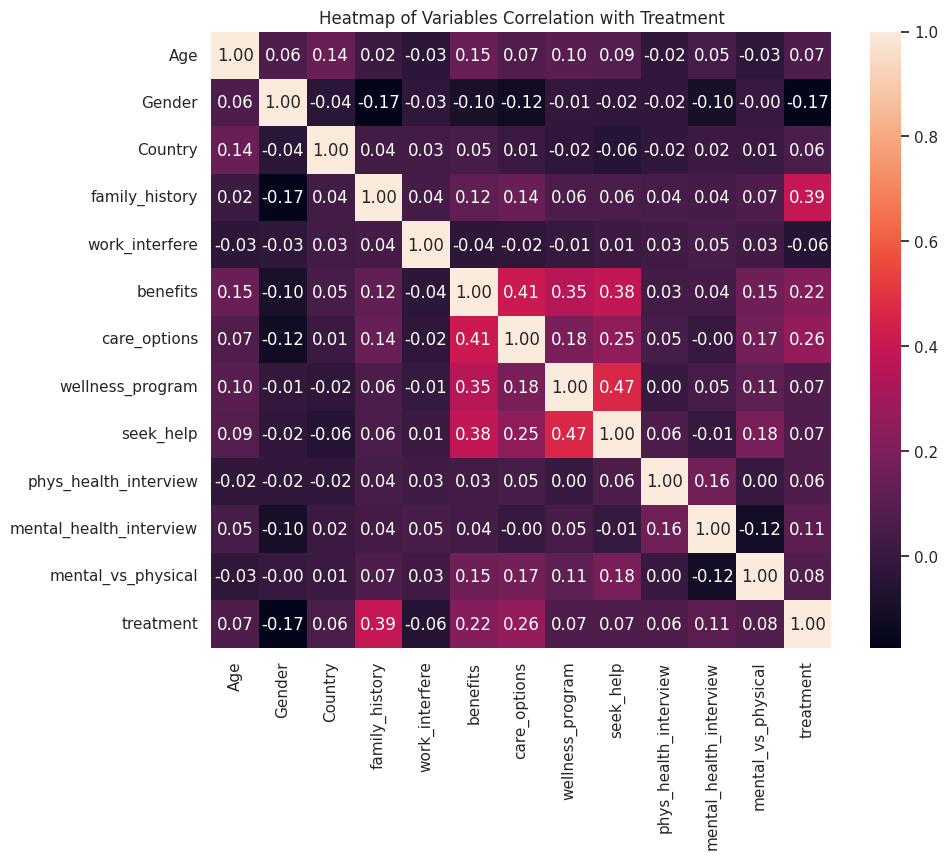

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/content/survey_cleaned.csv'
data = pd.read_csv(file_path)

# Convert categorical features to numerical
categorical_features = ['Gender', 'Country', 'family_history', 'treatment', 'work_interfere',
                        'benefits', 'care_options', 'wellness_program', 'seek_help',
                        'phys_health_interview', 'mental_health_interview', 'mental_vs_physical']

# Initialize a dictionary to store LabelEncoders for each categorical feature
encoders = {feature: LabelEncoder() for feature in categorical_features}

# Use the LabelEncoder instance from the dictionary to fit and transform the data
for feature in categorical_features:
    data[feature] = encoders[feature].fit_transform(data[feature].astype(str))

# Define features and target variable
features = ['Age', 'Gender', 'Country', 'family_history', 'work_interfere',
            'benefits', 'care_options', 'wellness_program', 'seek_help',
            'phys_health_interview', 'mental_health_interview', 'mental_vs_physical']

# Calculate the correlation matrix
corr = data[features + ['treatment']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Heatmap of Variables Correlation with Treatment')
plt.show()


# model

**random forest**

In [37]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/survey_cleaned.csv'
data = pd.read_csv(file_path, parse_dates=['Timestamp'])

# Convert categorical features to numerical
categorical_features = ['family_history', 'treatment', 'work_interfere',
                        'benefits', 'care_options', 'wellness_program', 'seek_help']

# Initialize a dictionary to store LabelEncoders for each categorical feature
encoders = {feature: LabelEncoder() for feature in categorical_features}

for feature in categorical_features:
    # Use the LabelEncoder instance from the dictionary to fit and transform the data
    data[feature] = encoders[feature].fit_transform(data[feature].astype(str))

# Define features and target variable
X = data[['family_history', 'work_interfere', 'benefits',
          'care_options', 'wellness_program', 'seek_help']]
y = data['treatment']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracyRF = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
reportRF = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')

import pandas as pd

# 创建一个包含性能指标的DataFrame
performance_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracyRF, reportRF.split()[5], reportRF.split()[10], reportRF.split()[14]]
})

# 将性能指标保存到CSV文件
performance_metrics.to_csv('/content/RFperformance_metrics.csv', index=False)



Accuracy: 0.81
Confusion Matrix:
[[67 13]
 [20 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        80
           1       0.84      0.78      0.81        90

    accuracy                           0.81       170
   macro avg       0.81      0.81      0.81       170
weighted avg       0.81      0.81      0.81       170



**Logistic Regression**

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Load the dataset
file_path = '/content/survey_cleaned.csv'
data = pd.read_csv(file_path, parse_dates=['Timestamp'])

# Select features and the target variable
features = ['Age', 'Gender', 'Country', 'self_employed', 'family_history', 'remote_work', 'tech_company']
target = 'treatment'

# Data preprocessing
X = data[features]
y = data[target].apply(lambda x: 1 if x == 'Yes' else 0)

# Perform one-hot encoding on categorical features
categorical_features = ['Gender', 'Country', 'self_employed', 'family_history', 'remote_work', 'tech_company']
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = onehot_encoder.fit_transform(X[categorical_features])

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# # # Build a Random Forest model for feature importance analysis
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)


# Logistic Regression Analysis
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Evaluate the Logistic Regression model
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)  # Calculate accuracy
report_log = classification_report(y_test, y_pred_log)  # Generate classification report

print("Logistic Regression Classification Report:\n")
print(report_log)

# Create a DataFrame to store performance metrics for Logistic Regression
performance_metrics_log = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy_log, report_log.split()[5], report_log.split()[10], report_log.split()[14]]
})

# Save the performance metrics for Logistic Regression to a CSV file
performance_metrics_log.to_csv('/content/LRperformance_metrics.csv', index=False)

# Calculate accuracy for Logistic Regression model
accuracy_log = accuracy_score(y_test, y_pred_log)

# Check the data type of accuracy
print(type(accuracy_log))




Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.76      0.71        80
           1       0.76      0.66      0.70        90

    accuracy                           0.71       170
   macro avg       0.71      0.71      0.71       170
weighted avg       0.71      0.71      0.71       170

<class 'numpy.float64'>


# **Comparison of accuracy**

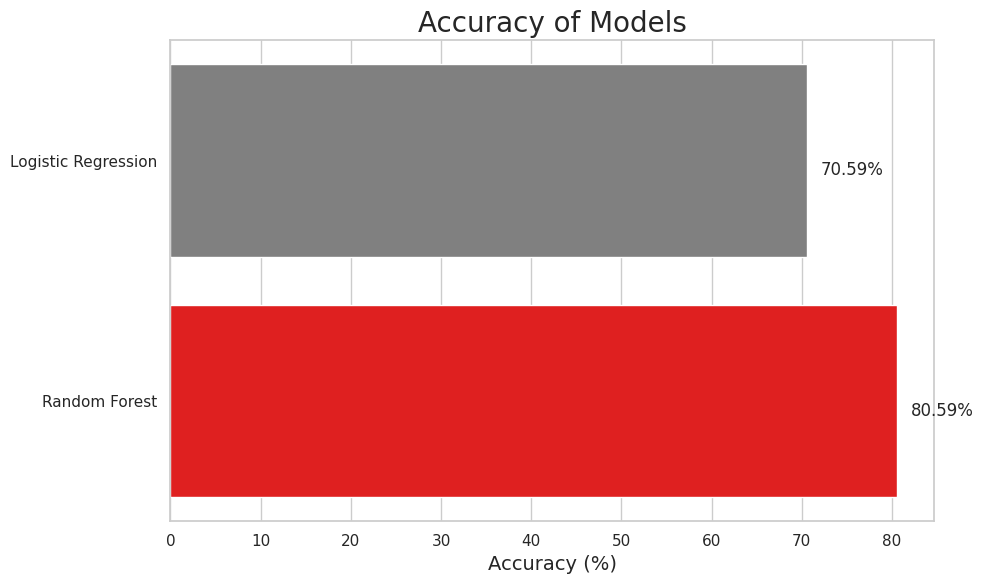

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取性能指标文件
lr_model_metrics_read = pd.read_csv('/content/LRperformance_metrics.csv')
rf_model_metrics_read = pd.read_csv('/content/RFperformance_metrics.csv')

# 从CSV文件中提取准确率，并转换为浮点数
lr_acc_ = float(lr_model_metrics_read['Value'].iloc[0])
rf_acc_ = float(rf_model_metrics_read['Value'].iloc[0])

# 准备数据，将准确率转换为百分比
accuracy_list = [lr_acc_ * 100, rf_acc_ * 100]
model_list = ["Logistic Regression", "Random Forest"]

# 创建一个DataFrame来存储模型和它们的准确率
df_models = pd.DataFrame({
    'Models': model_list,
    'Accuracy': accuracy_list
})

# 按准确率排序
df_models = df_models.sort_values(by="Accuracy")

# 设置绘图样式
sns.set_style('whitegrid')

# 绘制准确性比较图表
plt.figure(figsize=(10, 6))
clrs = ['grey' if (x < max(df_models['Accuracy'])) else 'red' for x in df_models['Accuracy']]
ax = sns.barplot(x='Accuracy', y='Models', data=df_models, palette=clrs)

# 设置标题和轴标签
plt.title('Accuracy of Models', fontsize=20)
plt.xlabel('Accuracy (%)', fontsize=14)
plt.ylabel('')

# 在条形图上添加注释
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

# 保存图表
plt.tight_layout()
plt.savefig('/content/accuracy_comparison.png')
plt.show()




# Comparison of Precision